In [105]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [77]:
data = pd.read_csv('data.csv')

In [78]:
data

,Country,Age,Salary,Purchased
0,France,44.0,72000.0,No
1,Spain,27.0,48000.0,Yes
2,Germany,30.0,54000.0,No
3,Spain,38.0,61000.0,No
4,Germany,40.0,NaN,Yes
5,France,35.0,58000.0,Yes
6,Spain,NaN,52000.0,No
7,France,48.0,79000.0,Yes
8,Germany,50.0,83000.0,No
9,France,37.0,67000.0,Yes


Here, independent variables are Country, Age, Salary, dependent variables are Purchased

In [79]:
# We need to seperate the data into dependent and independent variables
X_df = data.iloc[:,:3]
y_sr = data['Purchased']
X = data.iloc[:,:-1].values
y = data['Purchased'].values

A brief overview about object oriented programming, class, object, methods

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
Country      10 non-null object
Age          9 non-null float64
Salary       9 non-null float64
Purchased    10 non-null object
dtypes: float64(2), object(2)
memory usage: 400.0+ bytes


### Fill the missing value by calculating the mean of each column

In [81]:
X_df['Age'].fillna(X_df['Age'].mean(), inplace=True)
X_df['Salary'].fillna(X_df['Salary'].mean(), inplace=True)
X_df

,Country,Age,Salary
0,France,44.000000,72000.000000
1,Spain,27.000000,48000.000000
2,Germany,30.000000,54000.000000
3,Spain,38.000000,61000.000000
4,Germany,40.000000,63777.777778
5,France,35.000000,58000.000000
6,Spain,38.777778,52000.000000
7,France,48.000000,79000.000000
8,Germany,50.000000,83000.000000
9,France,37.000000,67000.000000


In [82]:
# Or we could fill the nan with sklearn
from sklearn.preprocessing import Imputer

In [83]:
imputer = Imputer(missing_values='NaN', strategy='mean', axis=0, copy=False)

In [84]:
imputer = imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

In [85]:
X

array([['France', 44.0, 72000.0],
       ['Spain', 27.0, 48000.0],
       ['Germany', 30.0, 54000.0],
       ['Spain', 38.0, 61000.0],
       ['Germany', 40.0, 63777.77777777778],
       ['France', 35.0, 58000.0],
       ['Spain', 38.77777777777778, 52000.0],
       ['France', 48.0, 79000.0],
       ['Germany', 50.0, 83000.0],
       ['France', 37.0, 67000.0]], dtype=object)

We could see that both the above two methods, either using pandas directly or with sklearn imputer class could achieve the same goal.

### Encode the categorical variables

In [86]:
# Convert categorical variables to labels using sklearn labelencoder
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X_df.loc[:, 'Country'] = le.fit_transform(X_df.loc[:, 'Country'])

In [87]:
# Using one hot encoding
one_hot_label = pd.get_dummies(data=X_df['Country'], prefix='Country', drop_first=True)
X_df = X_df.join(one_hot_label, how='outer')

In [88]:
X_df.drop(labels='Country', axis=1, inplace=True)

In [89]:
X_df

,Age,Salary,Country_1,Country_2
0,44.000000,72000.000000,0,0
1,27.000000,48000.000000,0,1
2,30.000000,54000.000000,1,0
3,38.000000,61000.000000,0,1
4,40.000000,63777.777778,1,0
5,35.000000,58000.000000,0,0
6,38.777778,52000.000000,0,1
7,48.000000,79000.000000,0,0
8,50.000000,83000.000000,1,0
9,37.000000,67000.000000,0,0


In [53]:
y_sr = y_sr.map({'Yes':1, 'No':0})

In [54]:
y_sr

0    0
1    1
2    0
3    0
4    1
5    1
6    0
7    1
8    0
9    1
Name: Purchased, dtype: int64

In [55]:
# We can also use the sklearn to process without the dependence on dataframe
from sklearn.preprocessing import OneHotEncoder

# Perform categorical labeling
X[:,0] = le.fit_transform(X[:,0])

In [56]:
# Perform onehot encoding
one_hot_encoder = OneHotEncoder(categorical_features=[0])
X = one_hot_encoder.fit_transform(X).toarray()

### Split the data into training and testing set

In [57]:
# Check to see if the target labels are uniform
y_sr.value_counts()

1    5
0    5
Name: Purchased, dtype: int64

In [94]:
# Now we need to split the data into training and testing set
from sklearn.model_selection import train_test_split

X_train,X_test, y_train, y_test = train_test_split(np.array(X_df), np.array(y_sr), test_size=0.2, stratify=np.array(y_sr), random_state=0)

### Feature scaling

In [97]:
X_train_df = pd.DataFrame(X_train, columns=X_df.columns)
X_train_df

,Age,Salary,Country_1,Country_2
0,44.000000,72000.000000,0.0,0.0
1,40.000000,63777.777778,1.0,0.0
2,38.777778,52000.000000,0.0,1.0
3,37.000000,67000.000000,0.0,0.0
4,38.000000,61000.000000,0.0,1.0
5,27.000000,48000.000000,0.0,1.0
6,30.000000,54000.000000,1.0,0.0
7,35.000000,58000.000000,0.0,0.0


In [98]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Lets recap the differences among standardization, normalization, and whitening

Standardization indicate to make mean zero and each feature share similar variance range

$f_{std}(x)=\frac{x_{max}-x_{min}}{Std}$

Normalization indicate to meke mean zero and range value range between 0 and 1

$f_{norm}(x)=\frac{x_{max}-x_{min}}{x_{max} - x_{min}}$

Whitenming means

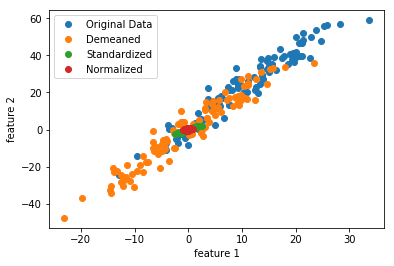

In [129]:
# Generate 2D distributed data with different scaling factor
X_f1 = np.random.normal(loc=10.0, scale=10.0, size=[100,1])
noise = np.random.normal(loc=0.0, scale=5.0, size=[100,1])
X_f2 = X_f1 * 2 + 3 + noise
plt.plot(X_f1, X_f2, 'o', label='Original Data')
plt.xlabel('feature 1')
plt.ylabel('feature 2')

# Combine the two features into one
X_f1_f2 = np.concatenate([X_f1, X_f2], axis=1)

# Apply different scaler
scaler = StandardScaler(with_mean=True, with_std=False)
X_f1_f2_tf1 = scaler.fit_transform(X_f1_f2)
plt.plot(X_f1_f2_tf1[:,0],X_f1_f2_tf1[:,1], 'o', label='Demeaned')

# Apply standardization
scaler = StandardScaler()
X_f1_f2_tf2 = scaler.fit_transform(X_f1_f2)
plt.plot(X_f1_f2_tf2[:,0],X_f1_f2_tf2[:,1], 'o', label='Standardized')

plt.legend()

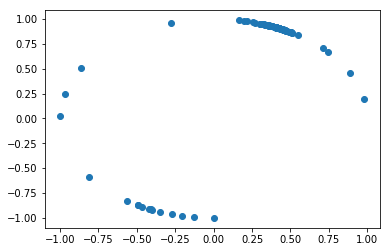

In [131]:
# Apply normalization
from sklearn.preprocessing import Normalizer
norm = Normalizer(norm='l2')
X_f1_f2_tf3 = norm.fit_transform(X_f1_f2)
plt.plot(X_f1_f2_tf3[:,0],X_f1_f2_tf3[:,1], 'o', label='Normalized')

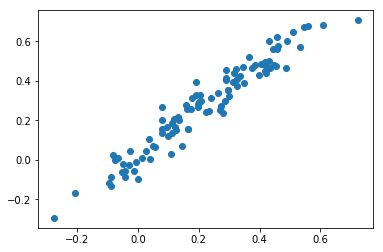

In [139]:
X_f1_f2_max_min = np.max(X_f1_f2,axis=0) - np.min(X_f1_f2,axis=0)
X_f1_f2_tf4 = X_f1_f2/X_f1_f2_max_min
plt.plot(X_f1_f2_tf4[:,0],X_f1_f2_tf4[:,1], 'o', label='Normalized')

Several important discussion point:

1. Whether we need to scale dummy variables depends on the purpose:

    1) Whether we need to explain the model will depend on how we are going to use it, as it is highly possible that the range is with the final scaled range (-1, 1)
    
    2) Even in the cases where Euclidean distance is not use directly by the model, it is still important to do feature scaling to make the model train faster, e.g., in decision tree. 
    
    3) Wheter we need to scale the dependent variables. For classification, not. But for regression, we might need to scale it as well.